In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.collections import LineCollection

In [9]:
# function to search for number of bonds on each particle
def count_bonds(bond_list):
    flat_list = [x for pair in bond_list for x in pair]
    counts = Counter(flat_list)
    counts = dict(sorted(counts.items()))
    return counts

# check intersection of two segments
#def check_intersection(bond_list):


# function to create a holder/containers for polymers i.e. now labelling the polymers
def create_molecule(bonds_list, deg_bonds):
    
    return None
    


In [10]:
phi = 0.5 # packing fraction
L = 30    # box length
n_part = int(phi*L*L/np.pi) # number of particles
radius = 1                  # radius of particles 
r_cut = 3.5                 # cut_off radius for forming the bonds between particles
r_cut_sq = r_cut**2         

prob_bond = 0.3             # probability of forming the bonds 

print("Total particles :", n_part)

list_pos_x = np.empty((n_part,))*np.nan        # containers for 
list_pos_y = np.empty((n_part,))*np.nan        # x and y positions of particles

bonds = []                                     # empty container for storing the bond pairs 
pos = []                                       # positions of pairs

deg_bonds = np.zeros(n_part, dtype=int)        # bond degree i.e. count of bonds on each particles

theta = np.random.uniform(0, 2*np.pi, n_part)  # initalise the orientations randomly

cnt = 0                                        # dummy iterator for the counting the pairs, where it runs over second element of a pair only 
while (cnt < n_part):                          # till the point where box is currently filled
    
    x,y = np.random.rand(2)*L                  # initialising a single particle randomly inside a box of length L

    overlap = False                            # boolean to test overlap, default false (checks ahead)
    for ii in range(0,cnt):                    # loop to test the overlap against all particles currently present inside the box
        r_sq = (x - list_pos_x[ii])**2 + (y - list_pos_y[ii])**2
        if(r_sq <= 4*radius**2):
            overlap = True
            break

    if overlap:                                # if overlap is detected skips(rejects) the initialised particle and goes back to while wtithout
        continue                               # changing the count of particles inside box
    
    list_pos_x[cnt] = x                        # if passes the checks 
    list_pos_y[cnt] = y                        # particle is assigned inside the box

    # till here we just add particle randomly (which satsifies no overlap) to the box. 

    # Now checking for bond formation once the particle is added
    
    for ii in range(0,cnt):
        dist_x = list_pos_x[cnt] - list_pos_x[ii]    
        dist_y = list_pos_y[cnt] - list_pos_y[ii]    # calculate the distance between current/new particle(cnt) and previously present particles(iterator ii) 

        dist_sq = dist_x**2 + dist_y**2
        #print(dist_sq<r_cut_sq)
        
        if(dist_sq <= r_cut_sq):                     # checks if distance between new particle and iterator particle is below threshold/cutoff
            bond_counts = count_bonds(bonds)         # counts the degree of bonds on each particle
            
            if(deg_bonds[ii] < 2 and deg_bonds[cnt] < 2):   # Check for max number of bonds possible by each particle 
                if(np.random.rand()<prob_bond):      # draw a uniform random (between 0 and 1) to check against probability of bond formation    
                    bonds.append([ii,cnt])           # create a bond, current particle (cnt), iterator ii (already in box)
                    deg_bonds[ii] += 1               # increment the count of degrees of each particle
                    deg_bonds[cnt] += 1
                
                # if(ii in bond_counts):
                #     if(bond_counts[ii] <= 2):
                #         bonds.append([ii,cnt])
                #     else:
                #         continue
                # else:
                #     bonds.append([ii,cnt])
                
    cnt = cnt+1 # move to next placement of particle in a box (i.e empty container)  

list_pos = np.column_stack((list_pos_x,list_pos_y)) # stack like rows of particles where each particle is an element with (x,y) positions

Total particles : 143


In [11]:
print(bonds)
print(count_bonds(bonds))
print(deg_bonds)
#counts_num = dict(Counter(cnt_bonds(bonds)))

[[1, 3], [13, 19], [15, 20], [11, 32], [27, 33], [29, 33], [7, 44], [36, 46], [36, 49], [46, 49], [0, 50], [27, 51], [35, 57], [48, 62], [34, 67], [52, 68], [23, 71], [58, 71], [51, 72], [13, 73], [14, 74], [53, 74], [9, 75], [12, 77], [40, 81], [30, 83], [64, 84], [58, 87], [39, 88], [6, 89], [10, 89], [54, 93], [22, 95], [5, 96], [59, 97], [31, 98], [47, 98], [50, 102], [7, 103], [21, 104], [52, 104], [22, 106], [78, 106], [86, 107], [19, 108], [34, 109], [44, 109], [75, 110], [41, 116], [73, 117], [11, 119], [115, 123], [3, 124], [28, 125], [47, 125], [39, 129], [60, 129], [108, 130], [4, 131], [67, 132], [65, 133], [93, 133], [16, 134], [16, 136], [23, 136], [45, 137], [81, 137], [24, 138], [69, 138], [2, 141], [60, 141]]
{0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 2, 9: 1, 10: 1, 11: 2, 12: 1, 13: 2, 14: 1, 15: 1, 16: 2, 19: 2, 20: 1, 21: 1, 22: 2, 23: 2, 24: 1, 27: 2, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 2, 34: 2, 35: 1, 36: 2, 39: 2, 40: 1, 41: 1, 44: 2, 45: 1, 46: 2, 47: 2,

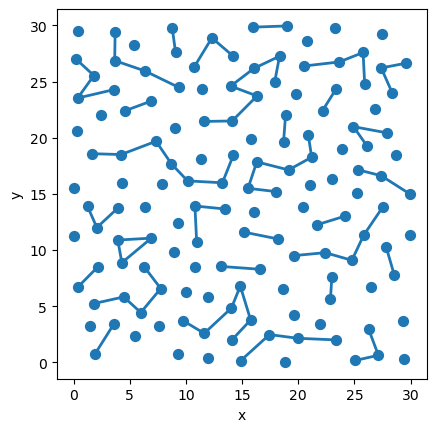

In [12]:


# Positions of nodes (N x 2)
# pos = np.array([
#     [0, 0],
#     [1, 1],
#     [2, 0],
#     [3, 1]
# ])

# Bonds as index pairs
#bonds = [(0, 1), (1, 2), (2, 3)]

# Build segment coordinate list from bonds
segments = [(list_pos[i], list_pos[j]) for (i, j) in bonds]
seg_arr = np.array(segments, dtype=float)

fig, ax = plt.subplots()

# Plot bonds
lc = LineCollection(seg_arr, linewidths=2)
ax.add_collection(lc)

# Plot nodes (optional)
ax.scatter(list_pos[:, 0], list_pos[:, 1], s=50)

ax.autoscale()
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.savefig("mixed_polymer_and_gel.png", dpi = 300, format = "png")
plt.savefig("mixed_polymer_and_gel.svg", dpi = 300, format = "svg")
plt.show()


In [4]:
#print(segments)